# Importing Libraries


In [215]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Reading CSV File

In [216]:
dataset = pd.read_csv(r'C:\Users\Mridul\Desktop\haberman.csv')

# Dataset Print

In [217]:
print(dataset)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]


# Print the number of datapoints and features.

In [218]:
dataset.shape

(305, 4)

# Add columns name to the dataset and recheck the columns names.

In [219]:
dataset.columns = ["Age","Op_Year","Axil_Nodes","Survival_Status"]
print(dataset.columns)

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')


# Checking first few values of the dataset

In [220]:
dataset.head()

,Age,Op_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Deleteing unecessary features

In [221]:
# Using  del dataset['Column_name']

# Check for missing values

In [222]:
dataset.isnull().sum()

Age                0
Op_Year            0
Axil_Nodes         0
Survival_Status    0
dtype: int64

# Filling missing data

In [223]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(dataset)

array([[30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       [31., 59.,  2.,  1.],
       ...,
       [77., 65.,  3.,  1.],
       [78., 65.,  1.,  2.],
       [83., 58.,  2.,  2.]])

# Dataset description

In [224]:
dataset.describe()

,Age,Op_Year,Axil_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Datapoint per class

In [225]:
dataset["Survival_Status"] = dataset["Survival_Status"].apply(lambda x: "Survived" if x == 1 else "Died")
dataset["Survival_Status"].value_counts()

Survived    224
Died         81
Name: Survival_Status, dtype: int64

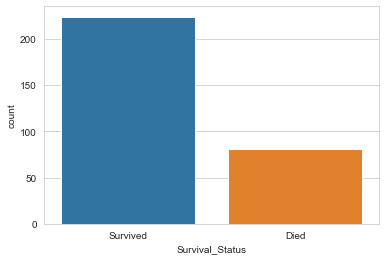

In [226]:
sns.countplot(dataset['Survival_Status'])

# Encoding categorical data ( Independent Variable)

In [227]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [index of categorical data])], remainder='passthrough')
#dataset = np.array(ct.fit_transform(dataset))

# Encoding categorical data ( Dependent Variable)

In [228]:
dataset.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Survival_Status'] = le.fit_transform(dataset['Survival_Status'])

dataset.head()

,Age,Op_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Checking Survival Status by a feature value

In [229]:
dataset[['Axil_Nodes','Survival_Status']].groupby(['Axil_Nodes']).mean().sort_values(by='Survival_Status',ascending=True)

,Survival_Status
Axil_Nodes,
52,0.000000
35,0.000000
24,0.000000
23,0.000000
21,0.000000
17,0.000000
13,0.200000
11,0.250000
19,0.333333


# Univariate Analysis 

## Histogram

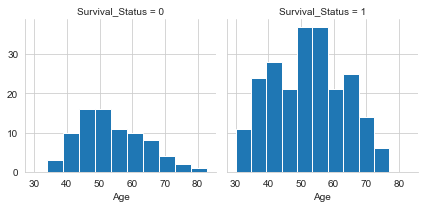

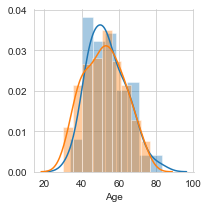

In [230]:
Age_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
Age_Grid.map(plt.hist,"Age",bins = 10)

Age_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
Age_Grid.map(sns.distplot,"Age" , rug = False , kde = True , hist = True)

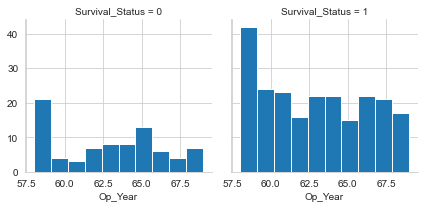

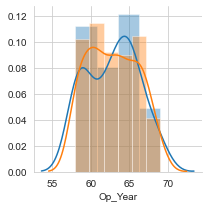

In [231]:
Op_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
Op_Grid.map(plt.hist,"Op_Year",bins = 10)


Op_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
Op_Grid.map(sns.distplot,"Op_Year" , rug = False , kde = True , hist = True)

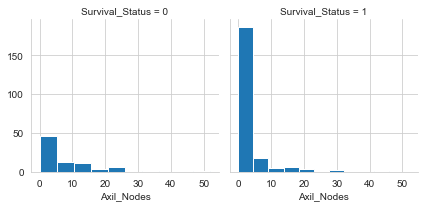

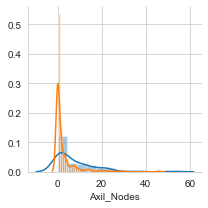

In [232]:
axil_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
axil_Grid.map(plt.hist,"Axil_Nodes",bins = 10)


axil_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
axil_Grid.map(sns.distplot,"Axil_Nodes" , rug = False , kde = True , hist = True)

## PDF and CDF 

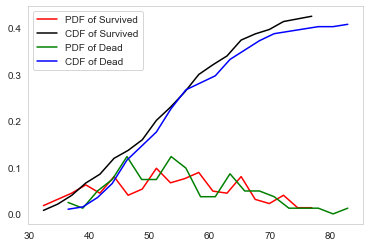

In [233]:
Survived = dataset.loc[dataset['Survival_Status'] == 1]
Dead =  dataset.loc[dataset['Survival_Status'] == 0]


count,bin_edges = np.histogram(Survived['Age'],bins = 20 ,density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Survived',color = 'red')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Survived',color = 'black')

count,bin_edges = np.histogram(Dead['Age'],bins = 20, density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Dead', color = 'green')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Dead',color = 'blue')
plt.grid()
plt.legend()

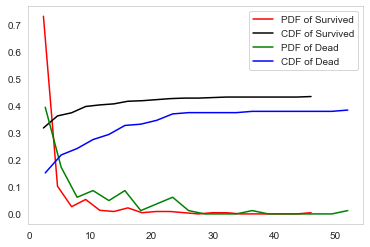

In [234]:
count,bin_edges = np.histogram(Survived['Axil_Nodes'],bins = 20 ,density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Survived',color = 'red')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Survived',color = 'black')

count,bin_edges = np.histogram(Dead['Axil_Nodes'],bins = 20, density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Dead', color = 'green')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Dead',color = 'blue')
plt.grid()
plt.legend()

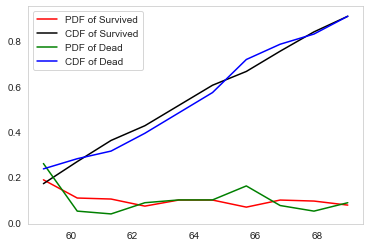

In [235]:
count,bin_edges = np.histogram(Survived['Op_Year'],bins = 10 ,density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Survived',color = 'red')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Survived',color = 'black')

count,bin_edges = np.histogram(Dead['Op_Year'],bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(count)
plt.plot(bin_edges[1:],pdf,label = 'PDF of Dead', color = 'green')
plt.plot(bin_edges[1:],cdf,label = 'CDF of Dead',color = 'blue')
plt.grid()
plt.legend()

## Box Plot

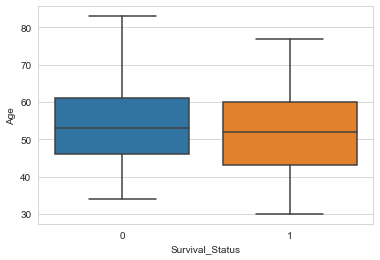

In [236]:
legend = ['Survived','Dead']
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Age'] )

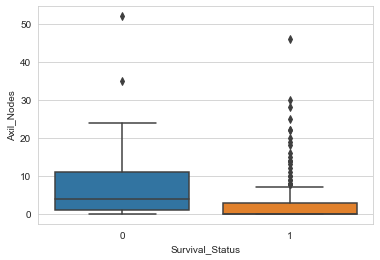

In [237]:
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Axil_Nodes'])

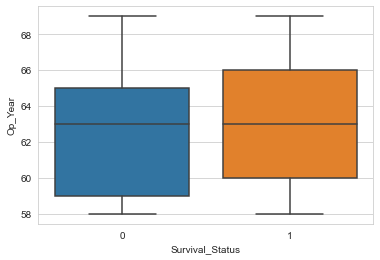

In [238]:
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Op_Year'])

## Violin Plot

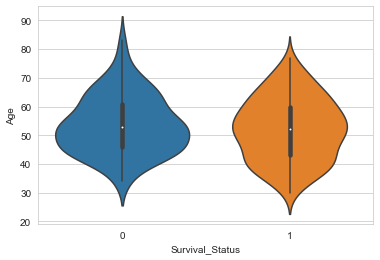

In [239]:
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Age'] )

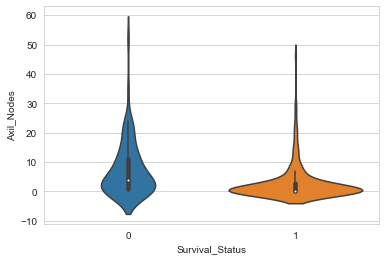

In [240]:
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Axil_Nodes'] )

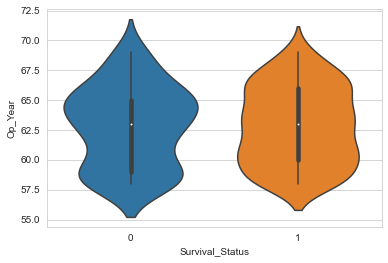

In [241]:
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Op_Year'] )

# BiVariate Analysis

## Pair Plot

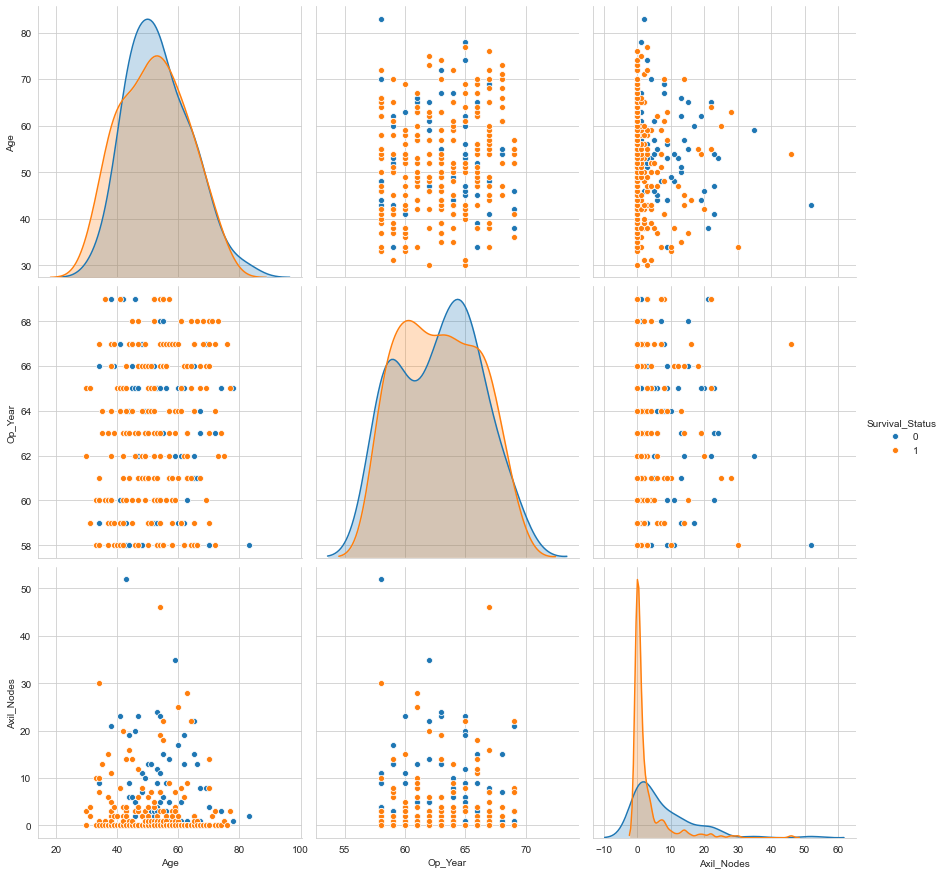

In [242]:
sns.set_style("whitegrid")
sns.pairplot(data = dataset , hue = 'Survival_Status',height = 4)


## HeatMap 

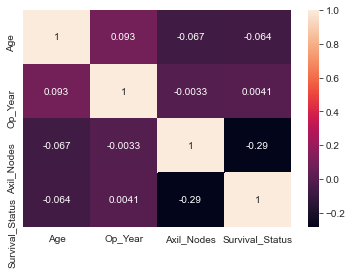

In [243]:
sns.heatmap(dataset.corr(),annot = True)

## Contour Plots

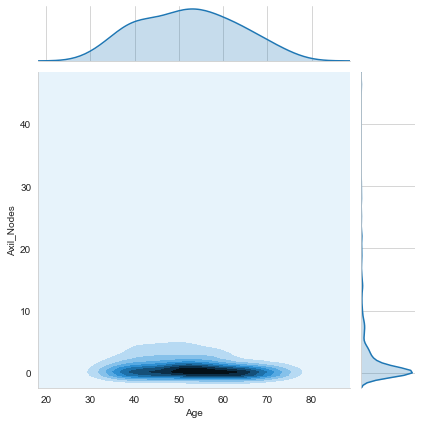

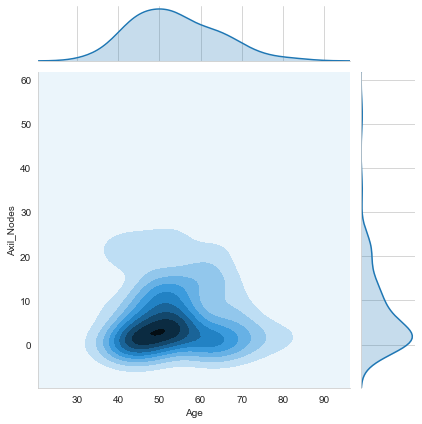

In [264]:
sns.jointplot(x = 'Age' , y = 'Axil_Nodes' , data = Survived , kind = 'kde')
sns.jointplot(x = 'Age' , y = 'Axil_Nodes' , data = Dead , kind = 'kde')
